In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
from scipy import stats
plt.xkcd()

The goal of this notebook is to show how importance sampling could be used to generate an estimate of an integral. The integral we have chosen to evaluate is $\int_0^\pi x \sin(x)$. 

First, let's plot the function we want to evaluate the integral of to choose a reasonable proposal distribution. 

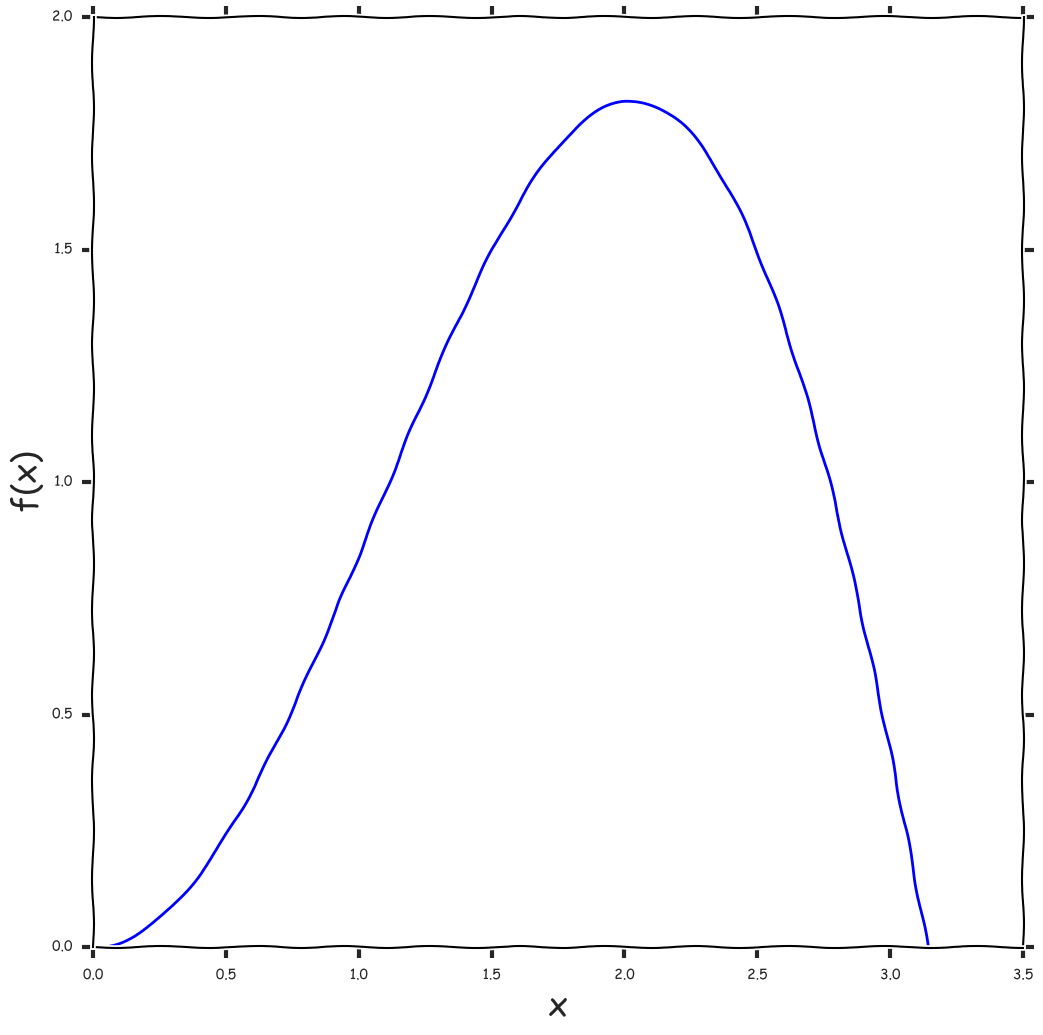

In [2]:
def f(x):
    return x*np.sin(x)

x = np.linspace(0, np.pi, 1000)
fig = plt.figure(figsize=(12,12))
plt.plot(x, f(x))
plt.xlabel('x', fontsize=24)
plt.ylabel('f(x)', fontsize=24)
plt.show()

Hmmmmm. Maybe a normal distribution centered at 2.0?

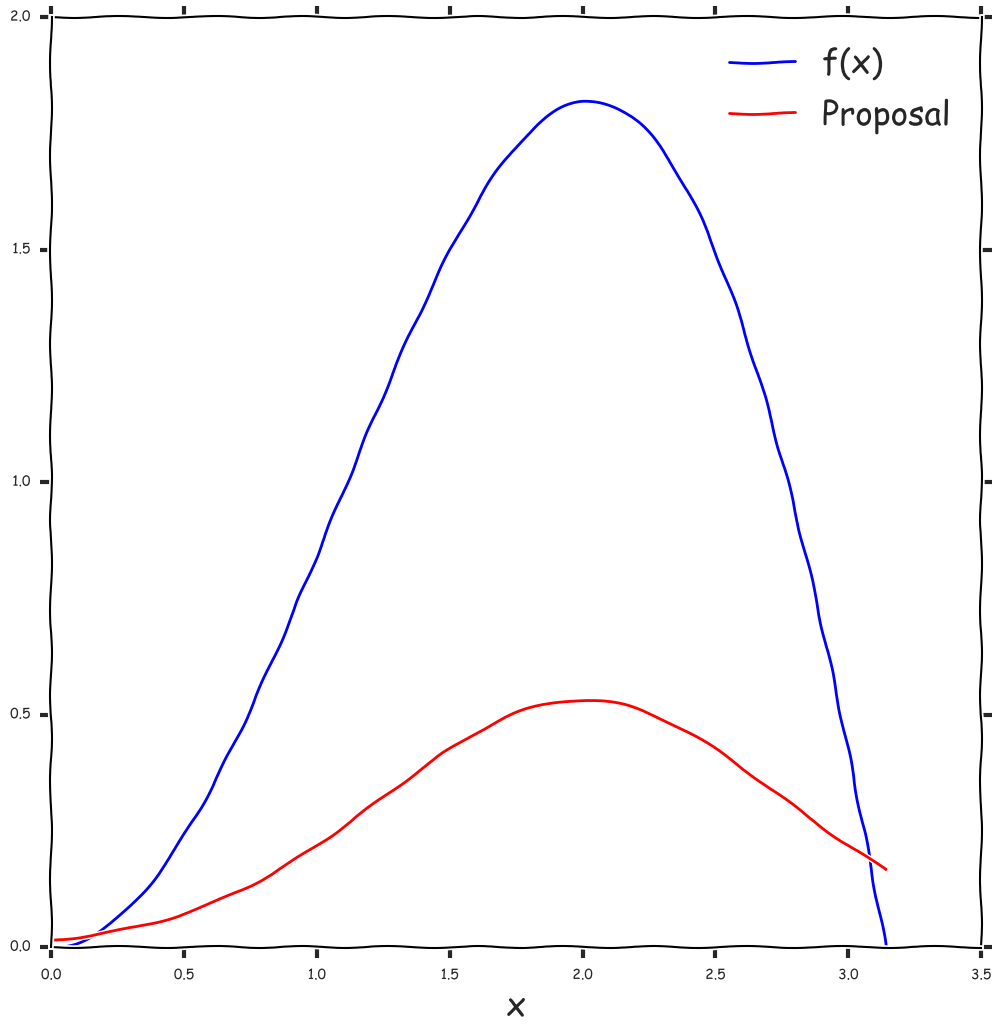

In [3]:
def p(x, mu=2.0, sig=0.75):
    return stats.norm.pdf(x-mu, scale=sig)

x = np.linspace(0, np.pi, 1000)
fig = plt.figure(figsize=(12,12))
plt.plot(x, f(x), label='f(x)')
plt.plot(x, p(x), label='Proposal')
plt.xlabel('x', fontsize=24)
plt.legend(loc='best', fontsize=24)
plt.show()

In [4]:
analytical_answer = np.pi

First, let's try the basic monte carlo approach. 

In [5]:
upper_bound = np.pi
lower_bound = 0.0
N = 1000

I = np.zeros(1000)
for i in xrange(1000):
    x = np.random.uniform(low=lower_bound, high=upper_bound, size=N)
    I[i] = (upper_bound - lower_bound)*np.mean(f(x))


In [6]:
print('Mean monte carlo estimate: %f'%(np.mean(I)))
print('Standard deviation in the monte carlo estimates: %f'%(np.std(I)))

Mean monte carlo estimate: 3.137587
Standard deviation in the monte carlo estimates: 0.062318


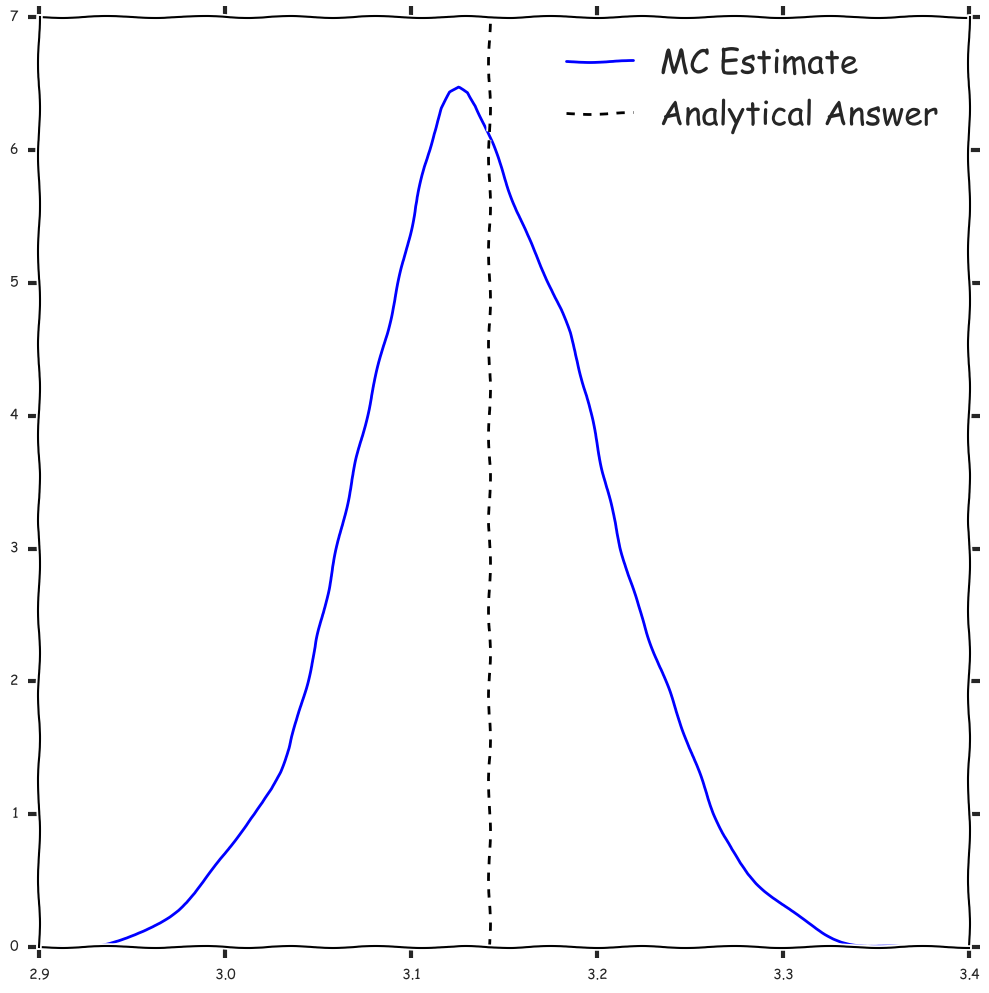

In [7]:
fig = plt.figure(figsize=(12,12))
sns.kdeplot(I, label='MC Estimate')
plt.axvline(analytical_answer, color='k', linestyle='--', label='Analytical Answer')
plt.legend(loc='best', fontsize=24)
plt.show()

Now, the importance sampling part. 

In [8]:
##parameters for proposed normal 

mu = 2.0
std = 0.75

I_imp = np.zeros(1000)

for i in xrange(1000): 
    x = mu + std*np.random.randn(N,1) ## draw from the proposed normal 
    x = x[(x<upper_bound) & (x>lower_bound)] 
    normalization = stats.norm.cdf(upper_bound-mu, scale=std)-stats.norm.cdf(lower_bound-mu, scale=std) ## normalization for gaussian from 0..pi
    I_imp[i] = np.mean(f(x)/p(x))*normalization

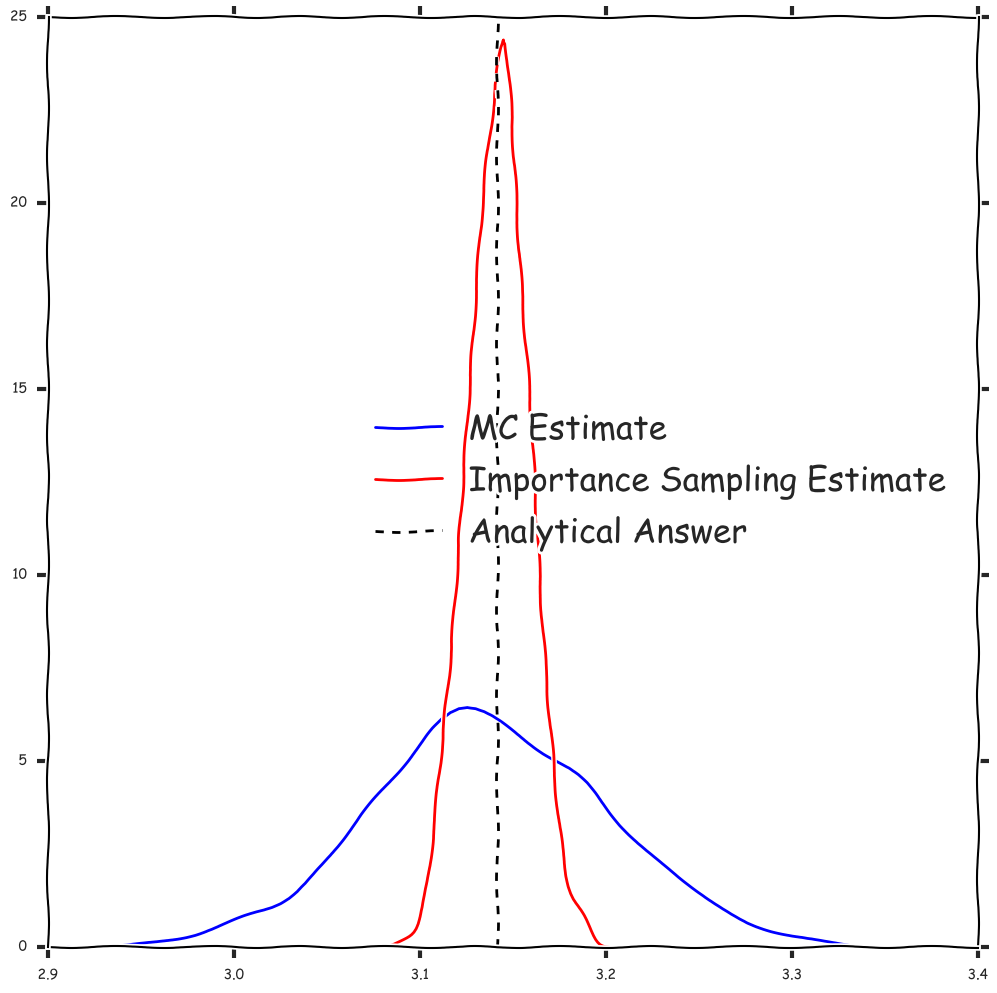

In [9]:
fig = plt.figure(figsize=(12,12))
sns.kdeplot(I, label='MC Estimate')
sns.kdeplot(I_imp, label='Importance Sampling Estimate')
plt.axvline(analytical_answer, color='k', linestyle='--', label='Analytical Answer')
plt.legend(loc='best', fontsize=24)
plt.show()

In [10]:
print('Mean importance sampling estimate: %f'%(np.mean(I_imp)))
print('Standard deviation in the importance sampling estimates: %f'%(np.std(I_imp)))

Mean importance sampling estimate: 3.142310
Standard deviation in the importance sampling estimates: 0.016350
